In [1]:
!git clone https://github.com/ultralytics/yolov5.git # clone
%cd yolov5
%pip install -r requirements.txt # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)


Setup complete ✅ (2 CPUs, 15.6 GB RAM, 3884.3/4030.6 GB disk)


In [2]:
from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'weights/yolov5{x}.pt')

  0%|          | 0.00/4.11M [00:00<?, ?B/s]

  0%|          | 0.00/14.9M [00:00<?, ?B/s]

  0%|          | 0.00/42.4M [00:00<?, ?B/s]

  0%|          | 0.00/91.9M [00:00<?, ?B/s]

  0%|          | 0.00/170M [00:00<?, ?B/s]

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="rWUZU8dyTTP8iwda7ccS")
project = rf.workspace("haoquan-fang-vuas5").project("helacell-s8pe9")
dataset = project.version(1).download("yolov5")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.5/145.5 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 13.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 19.3 MB/s eta 0:00:00
  Created wheel for glob2: filename=glob2-0.7-py2.py3-none-any.whl size=9320 sha256=87960c39f50d7858174d046995455e3d497833e668124f5b33c69225770113ab
  Stored in directory: /root/.cache/pip/wheels/d7/3c/72/5300602ba1269ffce8cff5dcf7b525fee756b57455903c37ba
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=b02e3e5c236c5d3

Extracting Dataset Version Zip to HelaCell-1 in yolov5pytorch:: 100%|██████████| 189/189 [00:00<00:00, 848.16it/s] 


wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
segment/train: weights=yolov5m-seg.pt, cfg=, data=/kaggle/working/yolov5/HelaCell-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=300, batch_size=128, imgsz=400, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train-seg, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.93

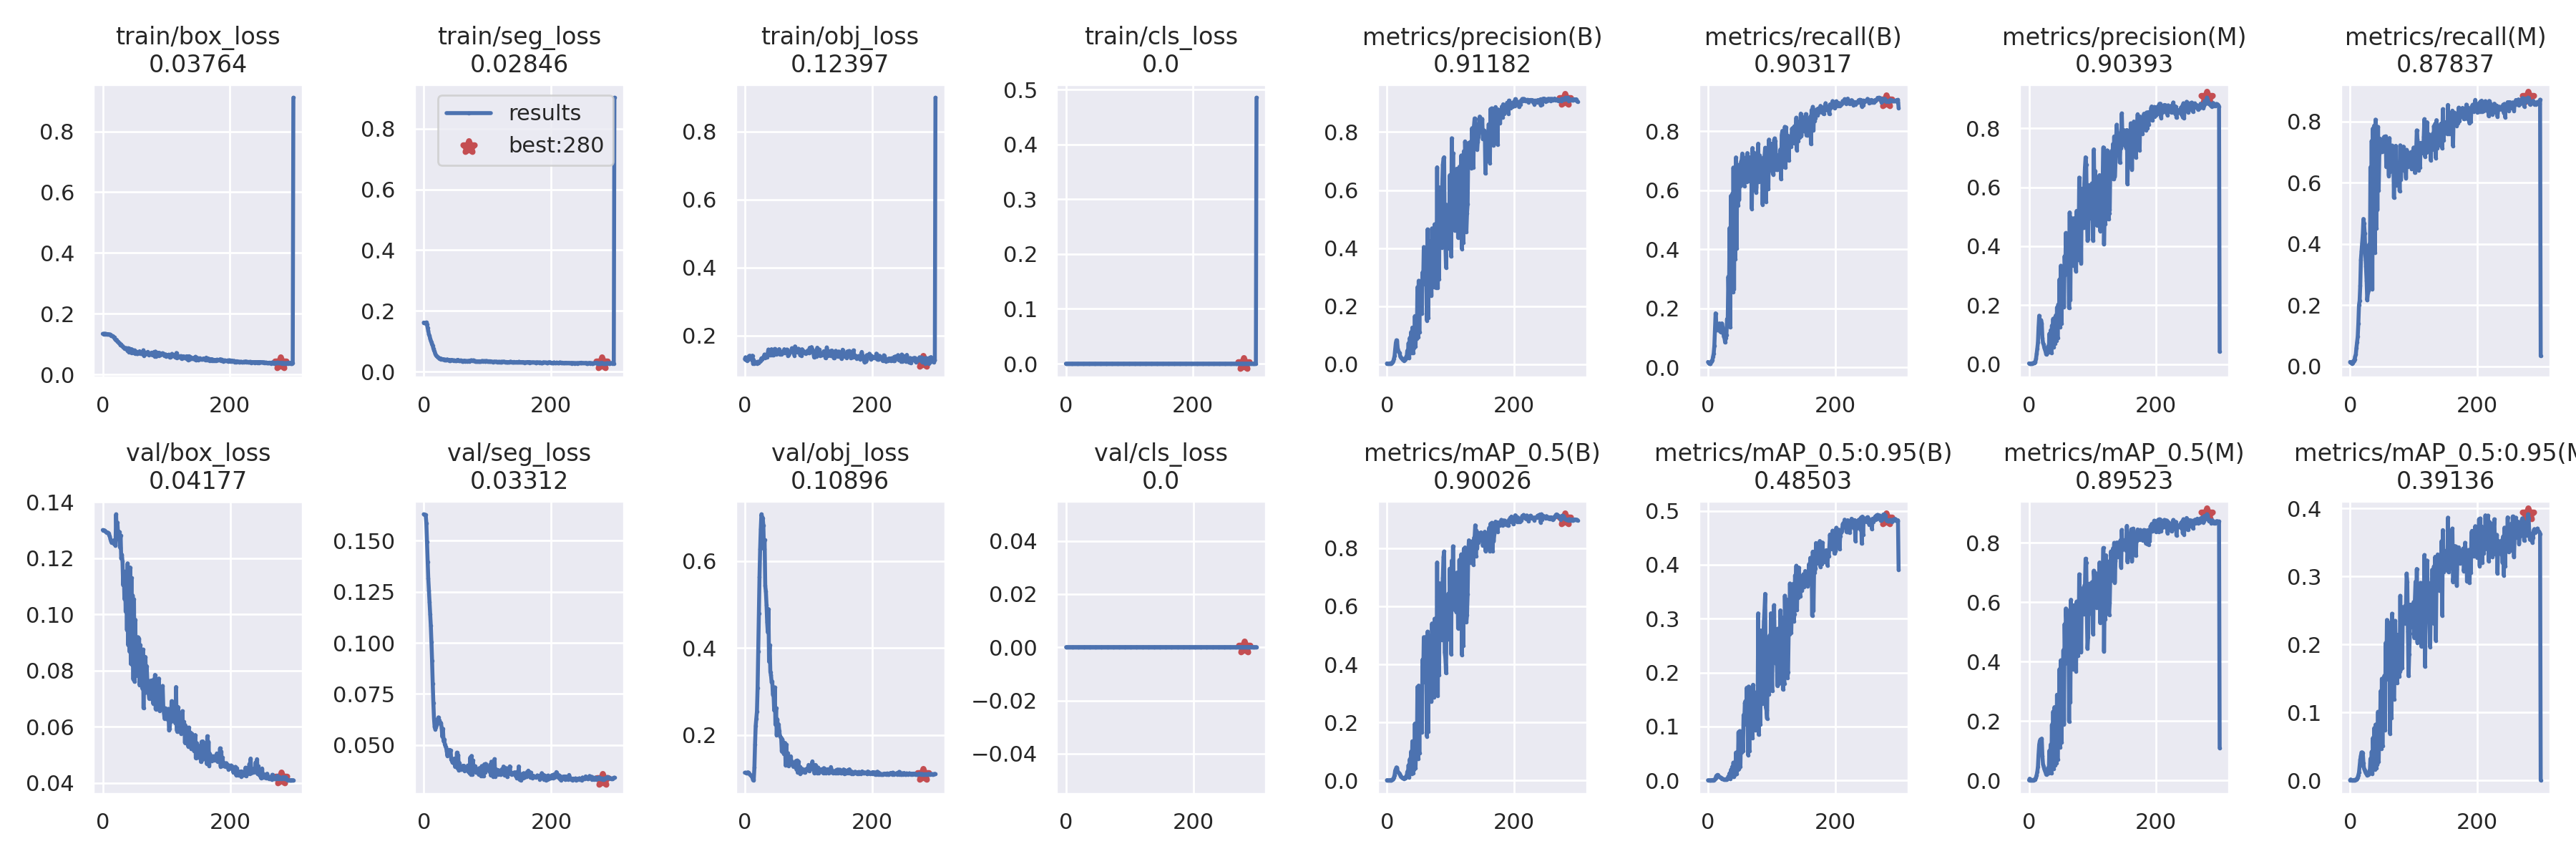

In [4]:
!python segment/train.py --img 400 --batch 128 --epochs 300 --data {dataset.location}/data.yaml --weights yolov5m-seg.pt
display.Image(filename=f'runs/train-seg/exp/results.png', width=1200)

In [5]:
!python segment/val.py --weights runs/train-seg/exp/weights/best.pt --data {dataset.location}/data.yaml --img 400

segment/val: data=/kaggle/working/yolov5/HelaCell-1/data.yaml, weights=['runs/train-seg/exp/weights/best.pt'], batch_size=32, imgsz=400, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.2-198-gacff977 Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 220 layers, 21652358 parameters, 0 gradients, 69.8 GFLOPs
WARNING ⚠️ --img-size 400 must be multiple of max stride 32, updating to 416
val: Scanning '/kaggle/working/yolov5/HelaCell-1/valid/labels.cache' images and 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all         27       1225      0.912      0.905      0.902      0.484      0.889      0.863      0.872      0.356
Speed: 1.1ms pre-process, 15.6ms inference